In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Forecasting Country-Level University Rankings Using Economic Indicators: A Comparative Modeling Approach (2017–2023)

### Author Ivan Georgiev Georgiev 

## Abstract 

This project investigates the relationship between university rankings and economic indicators, specifically GDP, across countries from 2017 to 2022. By identifying the top-performing countries and analyzing their historical data, we apply various forecasting models to predict 2023 university scores. 
To accomplish this, we apply and compare a set of forecasting methods, including:

- Linear Trend Extrapolation as a baseline; 
- exponential smoothing
- ARIMA

We then incorporate GDP data to explore economic influence, culminating in an ARIMAX model using GDP as an exogenous variable. Results are compared with actual 2023 data to evaluate prediction accuracy and economic influence.

Each model offers a different perspective—some prioritize time dynamics, while others emphasize economic context and uncertainty. Forecasts are validated using actual 2024 QS rankings where available. The results highlight both the predictive power of national-level indicators and the strengths and weaknesses of each forecasting technique.

This work provides a data-driven framework for understanding the evolution of educational performance across countries and suggests how policymakers and academic stakeholders might respond to long-term trends in global rankings. 

This study examines the interplay between economic development and the performance of elite higher education institutions. Utilizing QS World University Rankings data (2017–2024) for the top 300 universities in each year, coupled with GDP per capita statistics, we investigate the extent to which macroeconomic conditions shape institutional rankings. Restricting the analysis to the top 300 institutions ensures data completeness and reliability, mitigating biases from missing values prevalent in lower ranks. Employing a combination of statistical and time series forecasting approaches—including Linear Trend Extrapolation, Multiple Linear Regression, and ARIMA/ARIMAX—we project future ranking scores and evaluate the predictive power of economic indicators. The findings contribute to the understanding of how national economic performance influences the global standing of leading universities and offer implications for higher education policy and investment strategies.



## Introduction 

University rankings such as the QS World University Rankings are widely regarded as benchmarks for educational quality and global academic competitiveness. Countries that consistently host top-performing institutions are often seen as knowledge hubs, attracting international students, faculty, and investment.

Understanding what drives a country's university ranking performance is essential not only for educational policy but also for long-term socio-economic planning. Among the possible factors influencing rankings, economic indicators such as GDP (Gross Domestic Product) play a pivotal role, reflecting the country’s investment capability in education, research, and infrastructure.

This project aims to investigate whether we can predict a country's university performance (in terms of average QS score and number of universities) using historical trends and economic indicators like GDP. We also want to evaluate how different forecasting and statistical models perform in predicting such outcomes and whether economic data improves prediction accuracy.

Each model captures different assumptions: trend continuity (linear), economic impact (Monte Carlo), recent stability (MA), or momentum (smoothing). These approaches are compared quantitatively and visually in later sections. 

**Objective**
This project investigates whether global university rankings at the country level can be forecasted using key economic and educational indicators. Specifically, it aims to predict the average QS World University Rank per country for the year 2024 based on historical data (2017–2022) and variables such as GDP per capita, literacy rate, and R&D expenditure.

Motivation University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

Research Questions

To what extent do indicators like GDP per capita, literacy rate, and R&D investment correlate with average university rank?

Can time series and regression-based models accurately forecast future rankings using this data?

Which forecasting methods provide the most reliable and interpretable predictions?

Significance The ability to anticipate changes in a country's academic standing can inform education policy, international collaboration, and investment decisions. It also helps identify which countries are likely to improve or decline in global academic competitiveness — and why.

## Previous Work Preview

## Forecasting & Regression Models Overview/General Principles
We employ a progression of models from basic statistical methods to advanced time-series forecasting models, each justified below.

### Linear Trend Extrapolation
To model simple growth or decline over time and provide a baseline forecast.

Concept:
Assumes a linear relationship between time $t$ and the response variable $y_t$ (e.g., score). 
$$\hat{y}_t = \beta_0 + \beta_1 t$$
Where $\beta_0$ is the intercept, and $\beta_1$ is the slope (change in score per year).

### Moving Average Forecasting
To smooth out short-term fluctuations and highlight longer-term trends or cycles.

Concept:
Uses the average of past $k$ observations to predict the next value.

Simple Moving Average of window size $k$ 

$$\hat{y}_t = \frac{1}{k} \sum_{i = t - k}^{t - 1} y_i$$

### Exponential Smoothing (Single & Holt-Winters)
To give more weight to recent data points, which often better reflect future trends. Holt-Winters also captures trend and seasonality.

Concept:
A weighted average where weights decline exponentially for older observations.

**Single Exponential Smoothing**:
$$\hat{y}_t = \alpha y_{t-1} + (1 - \alpha) \hat{y}_{t-1}$$

Where $\alpha \in [0, 1]$ is the smoothing parameter.

**Holt’s Linear Trend Method (Two Parameters)**:
$$\begin{align*}
\ell_t &= \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
\hat{y}_{t+h} &= \ell_t + h b_t
\end{align*}$$

**Holt-Winters (Additive Seasonal):**
$$\hat{y}_{t+h} = \ell_t + h b_t + s_{t - m + (h \bmod m)}$$

### ARIMA (Autoregressive Integrated Moving Average)
A powerful time-series model that combines autoregression, differencing (to remove trends), and moving averages.

**Concept**
ARIMA(p,d,q) models the data as:

AR (p): regression on past values

I (d): differencing to remove trend

MA (q): regression on past forecast errors

**General ARIMA Equation**
$$
\phi(B)(1 - B)^d y_t = \theta(B) \varepsilon_t
$$

Where:

-$\quad \phi(B)$: autoregressive (AR) polynomial  
-$\quad \theta(B)$: moving average (MA) polynomial  
-$\quad B$: backshift operator, $B y_t = y_{t-1}$  
-$\quad \varepsilon_t$: white noise (error term)


### Correlation & Regression with GDP
To explore whether economic performance influences university rankings.

**Methods**
Pearson correlation for linear relationships

Spearman correlation for monotonic (not necessarily linear)

Simple linear regression to model effect of GDP on score

Simple Linear Regression Equation:
$$
\hat{y}_t = \beta_0 + \beta_1 \cdot \text{GDP}_t + \varepsilon_t
$$

### ARIMAX (ARIMA with Exogenous Variables)
o include external influences (GDP) in the ARIMA model.

**Concept**
Adds exogenous (independent) variables to ARIMA, enabling better prediction if those variables explain the variance.

ARIMAX Equation

$$
y_t = \beta_0 + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \sum_{k=1}^{m} \gamma_k x_{k,t} + \varepsilon_t
$$

Where:

$\quad x_{k,t}$: exogenous variables (e.g., GDP)  
$\quad \gamma_k$: coefficients for exogenous variables

## Experiment Setup and Methodology
### Datasets
**University Rankings (QS)**
Source: QS World University Rankings datasets (2017–2024)

Features used: Institution Name, Country, Year, Overall Score.

Derived features: Average score per country per year, Number of ranked universities per country per year

**GDP Data**
Source: [World Bank] 

Features used: Country, Year, GDP (constant USD), GDP per capita (optional) 

https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#

**Preprocessing**

- Standardized country names to match QS data.

- Filled missing values using linear interpolation or forward fill.

- Converted to time series format indexed by country and year.
### Instance Generation
We limit our focus to the top 10 countries by average QS score and number of universities. Instances are generated using a rolling window where applicable (e.g., for moving average, ARIMA).

Each instance represents a country-year pair, and consists of:

| Field              | Description                                      |
| ------------------ | ------------------------------------------------ |
| `country`          | Country name                                     |
| `year`             | Year (2017–2022 for training, 2023 for testing)  |
| `avg_score`        | Average university score in that year            |
| `num_universities` | Number of ranked universities                    |
| `gdp`              | GDP (in billions USD or normalized)              |
| `gdp_lagged`       | GDP from year t-1 (for lag correlation / ARIMAX) |


### Performance Metrics
To assess model performance, we use the following metrics on the 2023 forecast results:

| Metric                           | Formula                                | Interprets                            |   |                       |
| -------------------------------- | -------------------------------------- | ------------------------------------- | - | --------------------- |
| **MAE (Mean Absolute Error)**    | ( \frac{1}{n} \sum                     | y\_t - \hat{y}\_t                     | ) | Avg. absolute error   |
| **MSE (Mean Squared Error)**     | $\frac{1}{n} \sum (y_t - \hat{y}_t)^2$ | Penalizes large errors                |   |                       |
| **RMSE**                         | $\sqrt{MSE}$                           | More interpretable than MSE           |   |                       |
| **MAPE (Mean Absolute % Error)** | ( \frac{100%}{n} \sum \left            | \frac{y\_t - \hat{y}\_t}{y\_t} \right | ) | Relative error metric |


Each model’s prediction will be evaluated per country, and results will be summarized with visualizations and error tables.

### Methodologies Applied

We test and compare the following approaches:

**Baseline Models**
- Linear Trend Extrapolation
- Moving Average (Windowed)
- Exponential Smoothing (Simple + Holt-Winters)

**Time-Series Models**
- ARIMA(p,d,q) — Auto-selected by AIC/BIC grid search
- ARIMAX(p,d,q) with GDP — GDP used as exogenous regressor

**Correlation & Regression Models**
- Pearson / Spearman correlation between:
    -GDP and average university score
    -GDP and number of universities
- Linear regression:
$$
\text{score}_t = \beta_0 + \beta_1 \cdot \text{GDP}_{t-1} + \varepsilon_t
$$

### Validation and Assumptions
**Time Series Assumptions**
- Stationarity tested using ADF test
- Residual diagnostics applied to ARIMA models

**GDP as Exogenous**
- Assumes GDP from year $t−1$ influences rankings in year $t$

**Missing Data**
- Rows with missing scores were removed
- GDP gaps filled with forward fill or interpolation

### Experimental Design
Training Period: 2017–2022

Forecast Target: 2023

Test Comparison: Compare predictions to real 2023 QS scores

Top Countries Tracked:

Based on average score and number of institutions over 2017–2022

### Model Configuration and Hyperparameter Selection

| Model          | Parameters / Notes                                   |
| -------------- | ---------------------------------------------------- |
| Linear Trend   | Fitted by OLS regression                             |
| MA             | Window size = 3 years (2019–2021 for 2022)           |
| Exp. Smoothing | Alpha optimized using `statsmodels`                  |
| Holt-Winters   | Seasonal period = 1 (no strong seasonality expected) |
| ARIMA          | Grid search over p, d, q with AIC/BIC selection      |
| ARIMAX         | Same as ARIMA, with lagged GDP as external input     |



## Exploratory Data Analysis (EDA)

**Objective**
The EDA section examines how country-level indicators relate to average QS university rankings and identifies patterns, trends, and correlations in the data from 2017–2022.

### QS University Dataset
#### Data Overview
For University Ranking dataset we will display basic information and summaries. We will show the number of countries, years covered and display sample rows. As part of the data overview we will 

Check data types, missing values, and duplicate entries.
#### Data Cleaning
In respect to missing values, we observe that in the first dataset we have 3642 missing values.

Drop or impute missing scores (e.g., mean/linear interpolation)

Fill missing GDP values (e.g., forward-fill or interpolate)

Standardize country names:

Create a mapping dictionary to ensure consistency between datasets

Drop or flag outliers:

Identify countries with extremely low or high scores

Detect GDP outliers using IQR or Z-score

In [18]:
# Load dataset
df_rank = pd.read_csv("data/world-university-rankings-2017-to-2022.csv")

In [19]:
df_rank

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,"2,394",XL,"1,688"


In [20]:
# Display basic information
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [21]:
df_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6482.0,2019.693613,1.716683,2017.0,2018.0,2020.0,2021.000,2022.0
score,2820.0,46.595532,18.813110,23.5,31.8,40.6,58.025,100.0
student_faculty_ratio,6407.0,13.264554,6.604294,1.0,9.0,12.0,17.000,67.0


In [22]:
df_rank.head(5)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [23]:
num_countries_rank = df_rank['country'].nunique()
num_years_rank = df_rank['year'].nunique()

print(f"Ranking Dataset: {num_countries_rank} countries, {num_years_rank} years")

Ranking Dataset: 97 countries, 6 years


In [24]:
df_rank.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
dtype: object

In [25]:
print("Missing Values in Ranking Dataset:")
print(df_rank.isnull().sum())

Missing Values in Ranking Dataset:
university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64


In [26]:
# Convert rank_display to numeric if it's not already
df_rank['rank_display'] = pd.to_numeric(df_rank['rank_display'], errors='coerce')

# Filter top 300 for each year
df_top300 = df_rank[df_rank['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300['score'].isna().sum()
total_count = len(df_top300)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# Optional: check missing by year
missing_by_year = df_top300.groupby('year')['score'].apply(lambda x: x.isna().sum())
print("\nMissing scores by year:")
print(missing_by_year)

Total entries in top 300: 1802
Missing score entries: 7
Missing percentage: 0.39%

Missing scores by year:
year
2017    0
2018    2
2019    2
2020    3
2021    0
2022    0
Name: score, dtype: int64


In [27]:
df_top300.to_csv("top300_universities.csv", index=False)

In [28]:
df_top300.iloc[763]

university                                          University of Liverpool
year                                                                   2019
rank_display                                                          164.0
score                                                                  47.9
link                      https://www.topuniversities.com/universities/u...
country                                                      United Kingdom
city                                                              Liverpool
region                                                               Europe
logo                      https://www.topuniversities.com/sites/default/...
type                                                                 Public
research_output                                                   Very High
student_faculty_ratio                                                  10.0
international_students                                                9,500
size        

In [29]:
df_top300.shape

(1802, 15)

#### Feature Engineering
Compute:

Average score per country per year

Number of ranked universities per country per year

Optionally:

GDP per capita (GDP ÷ population if available)

Score change rate year-over-year (∆Score)

GDP growth rate

#### Country Ranking and Selection
Select Top 10 countries for two perspectives:

By average QS score (2017–2022)

By number of universities ranked

Visualize:

Bar plots of top 10 countries by score and count

Score trends over time for each top country

Heatmap of score correlations across countries

In [31]:
df_top300.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1802 entries, 0 to 5483
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              1802 non-null   object 
 1   year                    1802 non-null   int64  
 2   rank_display            1802 non-null   float64
 3   score                   1795 non-null   float64
 4   link                    1802 non-null   object 
 5   country                 1802 non-null   object 
 6   city                    1769 non-null   object 
 7   region                  1802 non-null   object 
 8   logo                    1802 non-null   object 
 9   type                    1795 non-null   object 
 10  research_output         1801 non-null   object 
 11  student_faculty_ratio   1796 non-null   float64
 12  international_students  1801 non-null   object 
 13  size                    1801 non-null   object 
 14  faculty_count           1796 non-null   objec

In [32]:
# Keep only the columns needed
df_clean = df_top300[["university", "year", "score", "country"]].copy()

In [33]:
# Strip whitespace and title-case country names
df_clean["country"] = df_clean["country"].str.strip()

# Replace common variations
country_replacements = {
    "USA": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",
    "UK": "United Kingdom",
    "Russia": "Russian Federation",
}
df_clean["country"] = df_clean["country"].replace(country_replacements)

In [34]:
df_clean = df_clean.drop_duplicates(subset=["university", "year", "country"])

In [35]:
df_clean = df_clean.dropna(subset=["score"])

In [36]:
df_clean["year"] = df_clean["year"].astype(int)
df_clean["score"] = df_clean["score"].astype(float)

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 5483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  1795 non-null   object 
 1   year        1795 non-null   int32  
 2   score       1795 non-null   float64
 3   country     1795 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 63.1+ KB


In [38]:
import pandas as pd

def tidy_university_dataset(df_clean: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregates by [year, country] and computes:
      - total_score (sum of 'score')
      - num_universities (unique 'university' count)
    Then drops raw columns (if present) from the returned aggregated frame.
    """
    # Aggregate
    agg_df = (
        df_clean.groupby(["year", "country"], as_index=False)
                .agg(total_score=("score", "sum"),
                     num_universities=("university", "nunique"))
    )

    # Drop the originals if you no longer need them (no-op here, but kept for clarity)
    agg_df = agg_df.drop(columns=["university", "score"], errors="ignore")

    return agg_df

In [39]:
import matplotlib.pyplot as plt

def plot_totals_and_counts_per_country_per_year(
    agg_data: pd.DataFrame,
    top_n: int = 10,
    top_by: str = "total_score",   # or "num_universities"
    figsize_per_row: tuple = (10, 2.8)
):
    """
    Makes two figures stacked by years:
      1) Total score per country
      2) Number of universities per country
    Uses the same top-N selection per year based on `top_by`.
    """
    years = sorted(agg_data["year"].unique())
    n_years = len(years)

    def top_per_year(df_year, by_col):
        return df_year.sort_values(by_col, ascending=False).head(top_n)

    # -------- Figure 1: Total Score --------
    fig1, axes1 = plt.subplots(
        n_years, 1,
        figsize=(figsize_per_row[0], max(figsize_per_row[1] * n_years, 2.5)),
        squeeze=False
    )
    for i, yr in enumerate(years):
        sub = agg_data[agg_data["year"] == yr].copy()
        top_set = top_per_year(sub, top_by)["country"]
        sub = sub[sub["country"].isin(top_set)].sort_values("total_score", ascending=False)

        ax = axes1[i, 0]
        ax.bar(sub["country"], sub["total_score"])
        ax.set_title(f"Total Score by Country — {yr}")
        ax.set_ylabel("Total Score")

        # Rotate + align tick labels (no 'ha' inside tick_params!)
        ax.tick_params(axis='x', labelrotation=45)
        plt.setp(ax.get_xticklabels(), ha='right')

    fig1.tight_layout()

    # -------- Figure 2: University Count --------
    fig2, axes2 = plt.subplots(
        n_years, 1,
        figsize=(figsize_per_row[0], max(figsize_per_row[1] * n_years, 2.5)),
        squeeze=False
    )
    for i, yr in enumerate(years):
        sub = agg_data[agg_data["year"] == yr].copy()
        top_set = top_per_year(sub, top_by)["country"]
        sub = sub[sub["country"].isin(top_set)].sort_values("num_universities", ascending=False)

        ax = axes2[i, 0]
        ax.bar(sub["country"], sub["num_universities"])
        ax.set_title(f"University Count by Country — {yr}")
        ax.set_ylabel("# Universities")

        ax.tick_params(axis='x', labelrotation=45)
        plt.setp(ax.get_xticklabels(), ha='right')

    fig2.tight_layout()
    return fig1, fig2

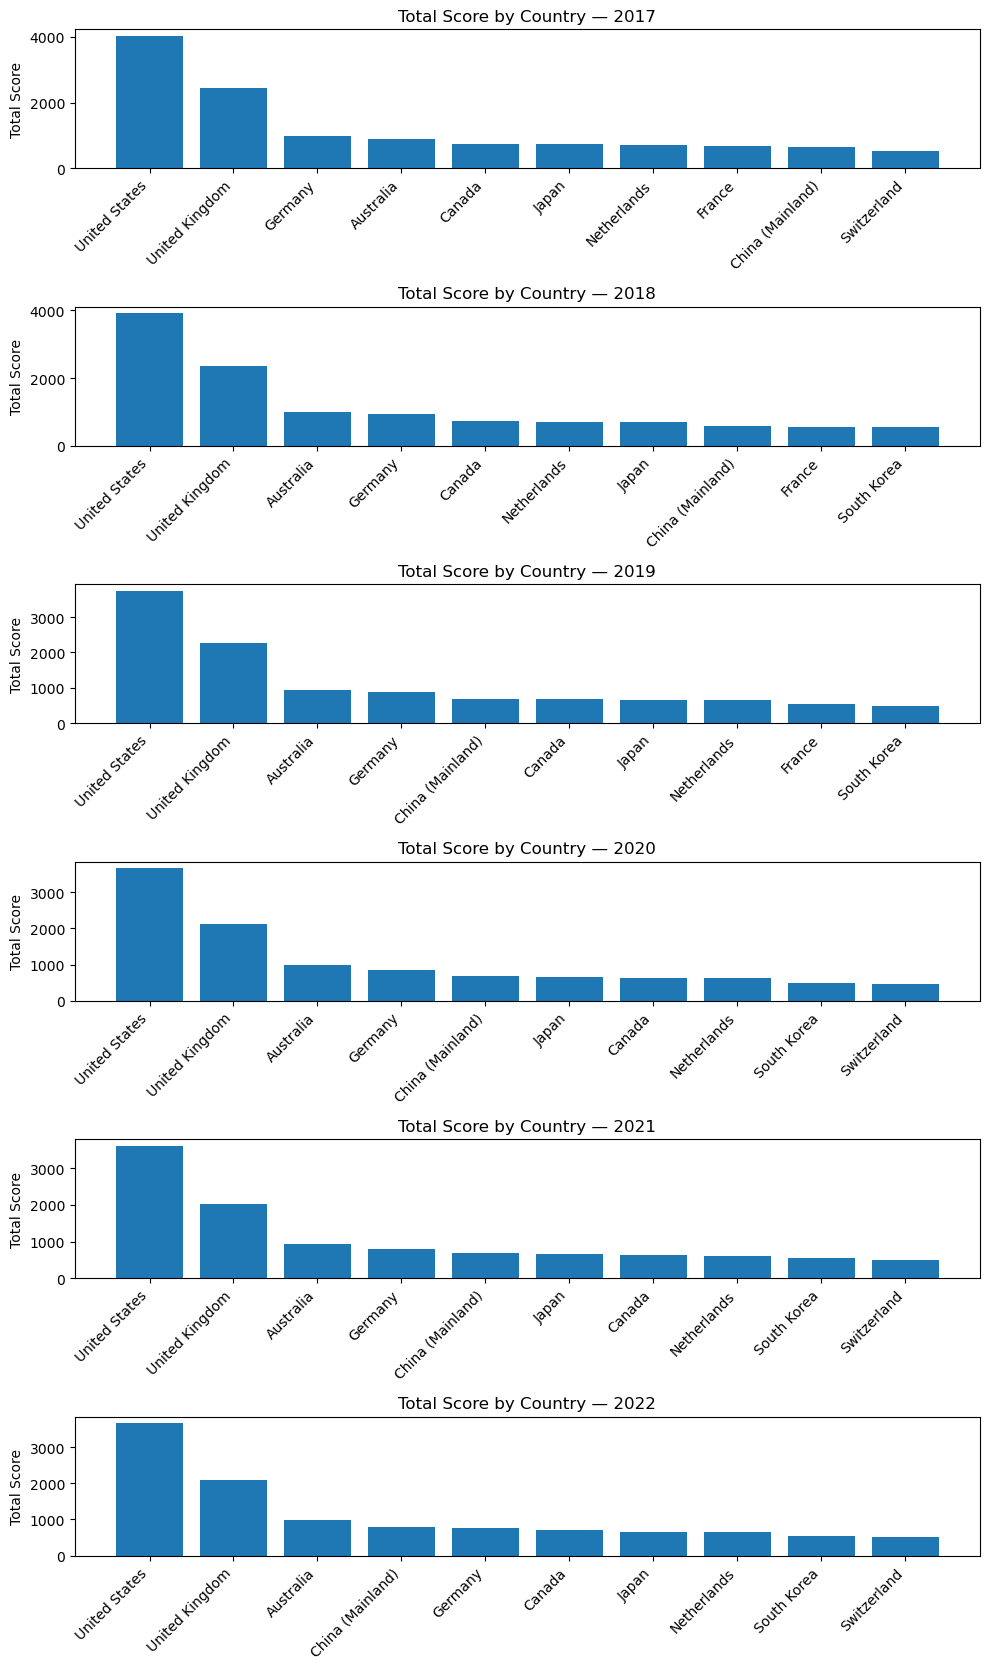

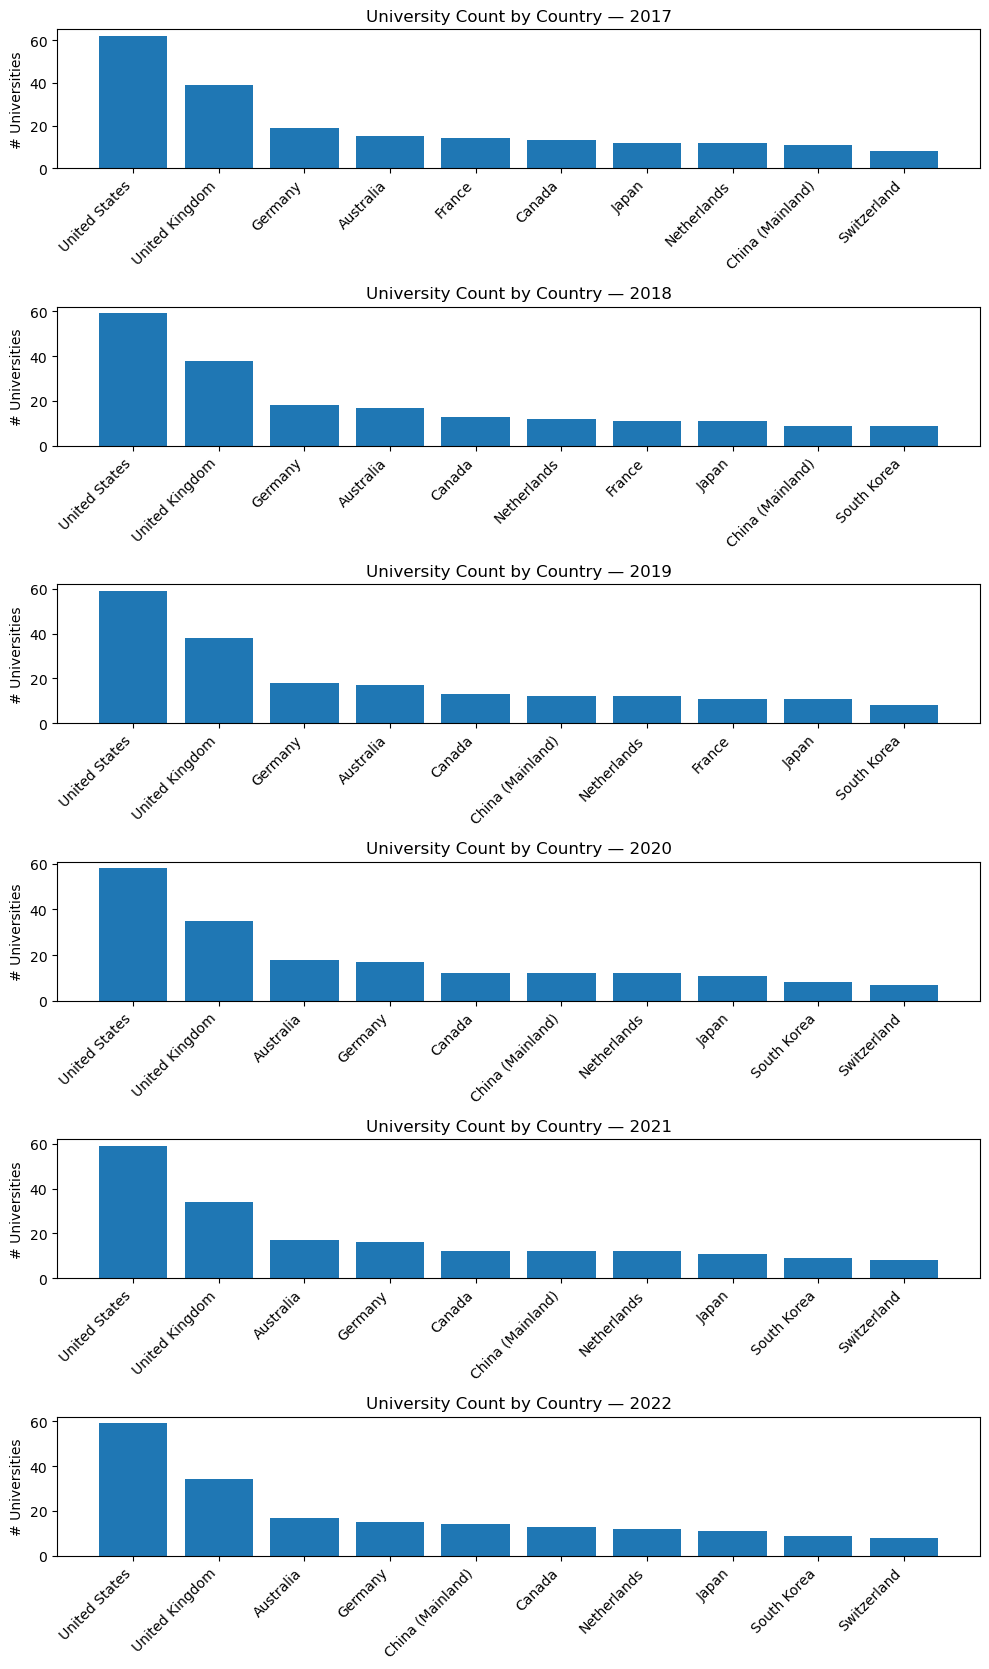

In [40]:
agg_data = tidy_university_dataset(df_clean)
fig1, fig2 = plot_totals_and_counts_per_country_per_year(
    agg_data, top_n=10, top_by="total_score"
)
plt.show()

In [41]:
agg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              249 non-null    int32  
 1   country           249 non-null    object 
 2   total_score       249 non-null    float64
 3   num_universities  249 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 6.9+ KB


### GDP and Education Expenditures Datasets

#### Data Overview
For GDP dataset we will display basic information and summaries. We will show the number of countries, 
years covered and display sample rows. As part of the data overview we will 

Check data types, missing values, and duplicate entries.
#### Data Cleaning

Drop or impute missing scores (e.g., mean/linear interpolation)

Fill missing GDP values (e.g., forward-fill or interpolate)

Standardize country names:

Create a mapping dictionary to ensure consistency between datasets

Drop or flag outliers:

Identify countries with extremely low or high scores

Detect GDP outliers using IQR or Z-score

In [44]:
df_gdp = pd.read_csv("data/gdp.csv")

In [45]:
#gdp_df = pd.read_csv("GDP.csv", skiprows=4)

# Preview the structure of the cleaned GDP dataframe
#gdp_df.head()

In [46]:
df_gdp

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [48]:
df_gdp.describe()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
count,268,266,266,266,266,266,266,266,266,266,266,266,266,266,266,266
unique,3,1,266,266,239,252,258,257,257,257,258,257,257,256,248,231
top,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,..
freq,266,266,1,1,26,14,7,8,8,8,7,8,8,9,17,34


In [49]:
df_gdp.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464


In [50]:
df_gdp.dtypes

Series Name      object
Series Code      object
Country Name     object
Country Code     object
1990 [YR1990]    object
2000 [YR2000]    object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
2023 [YR2023]    object
2024 [YR2024]    object
dtype: object

#### Feature Engineering
Compute:


GDP per capita (GDP ÷ population if available)

Score change rate year-over-year (∆Score)

GDP growth rate

Country Ranking and Selection
Select Top 10 countries for two perspectives:



By number of universities ranked

Visualize:

Bar plots of top 10 countries by score and count

In [52]:
# Step 2: Keep only GDP per capita (current US$)
gdp_filtered = df_gdp[df_gdp["Series Name"] == "GDP per capita (current US$)"].copy()

# Step 3: Drop unneeded columns
gdp_filtered = gdp_filtered.drop(columns=["Country Code", "Series Code", "Series Name"], errors="ignore")
gdp_filtered = gdp_filtered.loc[:, ~gdp_filtered.columns.str.contains("^Unnamed")]

# Step 4: Reshape from wide to long format
gdp_long = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")

# Clean year strings like "2017 [YR2017]" -> "2017"
gdp_long["year"] = gdp_long["year"].str.extract(r"(\d{4})")

# Continue with steps
gdp_long = gdp_long.rename(columns={"Country Name": "country"})
gdp_long["year"] = pd.to_numeric(gdp_long["year"], errors="coerce")
gdp_long = gdp_long.dropna(subset=["year", "gdp_per_capita"])
gdp_long["year"] = gdp_long["year"].astype(int)

# Filter for 2017–2024
gdp_long = gdp_long[gdp_long["year"].between(2017, 2024)]

gdp_long.head(20)

,country,year,gdp_per_capita
1064,Afghanistan,2017,525.469770891619
1065,Albania,2017,4614.0479692596
1066,Algeria,2017,4554.66753957828
1067,American Samoa,2017,11863.6839452565
1068,Andorra,2017,40672.9943348258
1069,Angola,2017,2437.25971190821
1070,Antigua and Barbuda,2017,16965.7288273816
1071,Argentina,2017,14532.5009308511
1072,Armenia,2017,3869.05373867752
1073,Aruba,2017,28440.051963759


### Time Series Characteristics
For each selected country:

Plot time series (2017–2022):

Average score over time, Number of universities

GDP trend, Decompose time series (optional):

Use seasonal_decompose() to view trend + noise + seasonal components

Test stationarity (ADF Test) on score time series:
      
Required for ARIMA

Plot rolling mean and variance

### Correlation Insights
Compute and visualize:

Pearson & Spearman correlation between:

Score and GDP, University count and GDP

Heatmaps of correlation matrix

Optional:

Scatter plots with regression line (GDP vs Score)

Key Analyses & Visuals
Distribution of Country Rankings

Histogram of average ranks across countries.

Boxplots grouped by income level or region.

Correlation Heatmap

Pearson correlations between:

Average QS rank

GDP per capita

Literacy rate

R&D expenditure

Expect negative correlation (e.g., higher GDP → better rank [lower number]).

Time Series Trends

Line plots for selected countries showing:

Rank trend (2017–2022)

GDP/literacy/R&D over time

Top & Bottom Performers

Table or bar plot of top 10 and bottom 10 countries by average rank.

Scatterplots

GDP vs. rank, Literacy vs. rank, R&D vs. rank

Add regression line and confidence interval.

Interpretation Example:
"Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

In [79]:
# Merge GDP with ranking stats
merged_df = pd.merge(gdp_long, agg_data, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df.head(20)

,country,year,gdp_per_capita,total_score,num_universities
0,Argentina,2017,14532.5009308511,65.8,1
1,Australia,2017,53901.7145392154,884.1,15
2,Austria,2017,47163.7425775142,139.0,3
3,Belgium,2017,44035.3239358548,318.7,6
4,Brazil,2017,10080.5092819305,107.0,2
5,Canada,2017,45129.628116623,733.1,13
6,Chile,2017,14879.9086227187,101.4,2
7,Colombia,2017,6479.53231292429,77.4,2
8,Denmark,2017,57521.5514992225,191.5,3
9,Finland,2017,46085.0174739036,164.5,3


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           219 non-null    object 
 1   year              219 non-null    int32  
 2   gdp_per_capita    219 non-null    object 
 3   total_score       219 non-null    float64
 4   num_universities  219 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 7.8+ KB


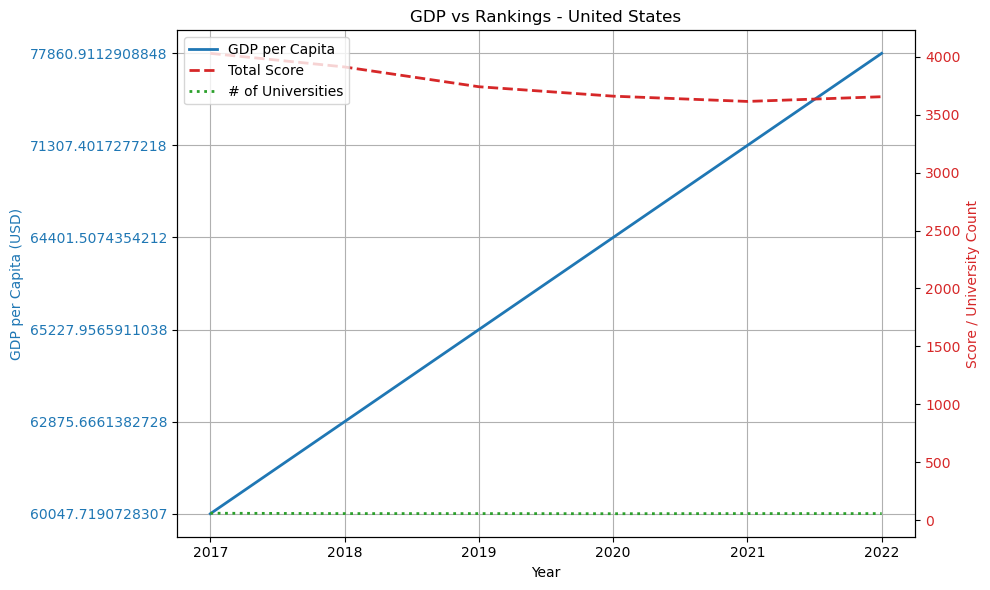

In [81]:
# Filter for the country
country = "United States"
country_df = merged_df[merged_df["country"] == country]

# Create figure and first axis (GDP)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP on left y-axis
ax1.set_title(f"GDP vs Rankings - {country}")
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per Capita (USD)", color="tab:blue")
ax1.plot(country_df["year"], country_df["gdp_per_capita"], label="GDP per Capita", color="tab:blue", linewidth=2)
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot average score and university count on right y-axis
ax2.set_ylabel("Score / University Count", color="tab:red")
ax2.plot(country_df["year"], country_df["total_score"], label="Total Score", color="tab:red", linestyle="--", linewidth=2)
ax2.plot(country_df["year"], country_df["num_universities"], label="# of Universities", color="tab:green", 
         linestyle=":", linewidth=2)
ax2.tick_params(axis="y", labelcolor="tab:red")

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

# Grid and layout
ax1.grid(True)
plt.tight_layout()
plt.show()

In [83]:
# Compute correlation matrix
correlation = merged_df[["gdp_per_capita", "total_score", "num_universities"]].corr()

# Display correlation table
print(correlation)

                  gdp_per_capita  total_score  num_universities
gdp_per_capita          1.000000     0.303209          0.300159
total_score             0.303209     1.000000          0.996667
num_universities        0.300159     0.996667          1.000000


In [ ]:
# Load your dataset
edu_df = pd.read_csv("world-education-data.csv")  

# Keep only the relevant columns
spending_df = edu_df[["country", "year", "gov_exp_pct_gdp"]].copy()

# Drop missing values (optional: you can choose to keep them too)
spending_df = spending_df.dropna(subset=["gov_exp_pct_gdp"])

# Convert year to integer
spending_df["year"] = spending_df["year"].astype(int)

# Optional: Filter for years of interest
spending_df = spending_df[spending_df["year"].between(2017, 2024)]

# View results
spending_df.head(20)

In [ ]:
merged = pd.merge(merged_df, spending_df, on=["country", "year"], how="left")

In [ ]:
merged[["gov_exp_pct_gdp", "score", "gdp_per_capita"]].corr()

In [ ]:
print(merged_df.columns.tolist())

In [ ]:
edu_df = pd.read_csv("world-education-data.csv")  

# Keep only the relevant columns
edu_features_df = edu_df[[
    "country", "year",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]].copy()


In [ ]:
merged_df = pd.merge(merged_df, edu_features_df, on=["country", "year"], how="left")

In [ ]:
# Select only the relevant columns
columns_of_interest = [
    "score",
    "gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Filter the dataset
edu_corr = merged_df[columns_of_interest].dropna()

# Compute correlation
corr_matrix = edu_corr.corr()
print(corr_matrix)

# Display as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Education Indicators vs Score")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Step 1: Define the features and target
features = [
    "gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Drop missing values
model_data = merged_df.dropna(subset=features + ["score"])

# X = predictors, y = target
X = model_data[features]
y = model_data["score"]

In [ ]:
# Fit the model
reg = LinearRegression()
reg.fit(X, y)

# Predict
y_pred = reg.predict(X)

# R-squared
r2 = r2_score(y, y_pred)

# Coefficients
print("📊 Multiple Linear Regression Results:")
for feature, coef in zip(features, reg.coef_):
    print(f"{feature}: {coef:.4f}")
    
print(f"\nIntercept: {reg.intercept_:.2f}")
print(f"R² (explained variance): {r2:.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted University Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Add log-transformed GDP column
merged_df["log_gdp_per_capita"] = np.log(merged_df["gdp_per_capita"])

# Optional: confirm no -inf or NaN values
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define new feature list
log_features = [
    "log_gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Drop missing
log_model_data = merged_df.dropna(subset=log_features + ["score"])
X_log = log_model_data[log_features]
y_log = log_model_data["score"]

# Fit the model
log_model = LinearRegression()
log_model.fit(X_log, y_log)
y_log_pred = log_model.predict(X_log)

# Print results
print("📊 Multiple Regression with log(GDP):")
for f, coef in zip(log_features, log_model.coef_):
    print(f"{f}: {coef:.4f}")

print(f"\nIntercept: {log_model.intercept_:.2f}")
print(f"R² (explained variance): {r2_score(y_log, y_log_pred):.4f}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Get GDP per capita time series for United States (2017–2023)
country = "United States"
gdp_series = merged_df[(merged_df["country"] == country) & (merged_df["year"] <= 2023)]
gdp_series = gdp_series.set_index("year")["gdp_per_capita"]

# Step 2: Fit ARIMA model (try (1,1,1) as a default)
model = ARIMA(gdp_series, order=(1, 1, 1))
model_fit = model.fit()

# Step 3: Forecast GDP for 2024
gdp_forecast_2024 = model_fit.forecast(steps=1)
forecasted_gdp = gdp_forecast_2024.iloc[0]

print(f"📈 Forecasted GDP per capita for {country} in 2024: ${forecasted_gdp:,.2f}")

In [ ]:
features = ['log_gdp_per_capita', 'gov_exp_pct_gdp', 'lit_rate_adult_pct',
            'school_enrol_primary_pct', 'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']

In [ ]:
merged_df[(merged_df["country"] == "United States") & (merged_df["year"] == 2024)]


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Define the features used in your log-GDP regression model
features = [
    "log_gdp_per_capita",
    "gov_exp_pct_gdp",
    "lit_rate_adult_pct",
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# Step 2: Create a minimal input row for 2024
# Replace these values with averages or reasonable estimates
input_row_2024 = pd.DataFrame([{
    "log_gdp_per_capita": np.log(forecasted_gdp),
    "gov_exp_pct_gdp": 5.0,                  # average: ~5% of GDP
    "lit_rate_adult_pct": 99.0,              # high literacy for US
    "school_enrol_primary_pct": 102.0,       # slightly over 100% (common due to repeaters)
    "school_enrol_secondary_pct": 95.0,
    "school_enrol_tertiary_pct": 70.0
}])

# Step 3: Predict score
predicted_score_2024 = log_model.predict(input_row_2024)[0]
print(f"🎓 Predicted university score for United States in 2024 (GDP-based): {predicted_score_2024:.2f}")


## Baseline Forecasting Models (Score Prediction)
**Methods**
- Linear Trend Extrapolation

- Moving Average

- Exponential Smoothing

- Holt-Winters (with trend & seasonality)

- (Optional) Monte Carlo Simulation

**Outputs**

Forecast 2023 average score for each of top 10 countries

Compare predictions to actual 2023 

Forecast Outputs Summarize predictions for 2024 from all models (as described in the comparison table above):

Country Linear Monte Carlo Prophet ARIMAX Actual (2024) USA 53.2 52.9 ± 1.4 53.1 53.4 52.8

Plot bar graphs or line charts showing:

Predicted vs. actual

Model uncertainty (for Monte Carlo, Prophet, ARIMAX)

Model Evaluation If actual 2024 data is available:

Use MAE, RMSE, and MAPE as metrics.

Compare performance across countries and models.

Example Discussion Points: "Monte Carlo and ARIMAX produced the lowest MAE for high-ranking countries."

"Prophet struggled in countries with unstable GDP trends."

"Linear trend was consistent but less sensitive to economic shifts."

In [99]:
# Find top 10 countries by average total_score
top10_countries = (
    merged_df.groupby("country")["total_score"]
    .mean()
    .nlargest(10)
    .index
)

# Filter dataset
top10_df = merged_df[merged_df["country"].isin(top10_countries)].copy()
top10_df = top10_df.sort_values(["country", "year"])

In [105]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Moving Average
def moving_average_forecast(df, window=3):
    results = {}
    for country, group in df.groupby("country"):
        ma = group["total_score"].rolling(window).mean().iloc[-1]
        preds = [ma] * 2  # same prediction for next 2 years
        results[country] = preds
    return results

# Simple Exponential Smoothing
def exponential_smoothing_forecast(df, forecast_periods=2):
    results = {}
    for country, group in df.groupby("country"):
        model = SimpleExpSmoothing(group["total_score"]).fit(smoothing_level=0.2, optimized=False)
        preds = model.forecast(forecast_periods)
        results[country] = preds.values
    return results

# Holt-Winters (trend only for yearly data)
def holt_winters_forecast(df, forecast_periods=2):
    results = {}
    for country, group in df.groupby("country"):
        model = ExponentialSmoothing(group["total_score"], trend='add', seasonal=None).fit()
        preds = model.forecast(forecast_periods)
        results[country] = preds.values
    return results


In [115]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt

# ========= 0) Prep & Top 10 filter =========
# Ensure types
merged_df = merged_df.copy()
merged_df["gdp_per_capita"] = pd.to_numeric(merged_df["gdp_per_capita"], errors="coerce")
merged_df["year"] = merged_df["year"].astype(int)

# Top 10 by average total_score
top10_countries = (
    merged_df.groupby("country")["total_score"]
    .mean()
    .nlargest(10)
    .index
)
top10_df = merged_df[merged_df["country"].isin(top10_countries)].sort_values(["country", "year"]).copy()

# ========= 1) Time-index helpers (Y-DEC) =========
def yearly_series(group, value_col="total_score"):
    """Return a regular annual PeriodIndex series with freq=Y-DEC."""
    g = group.sort_values("year")
    s = g.set_index(pd.PeriodIndex(g["year"].astype(int), freq="Y-DEC"))[value_col]
    s = s.asfreq("Y-DEC")  # ensure regularity; introduces NaN if years missing
    # If there are internal NaNs (missing years), simple forward/back fill
    if s.isna().any():
        s = s.interpolate(limit_direction="both")
    return s

def future_index(s, steps):
    """Future yearly PeriodIndex aligned to the series freq."""
    return pd.period_range(s.index[-1] + 1, periods=steps, freq=s.index.freq)

# ========= 2) Models =========
def moving_average_forecast(df, window=3, steps=2):
    out = {}
    for c, g in df.groupby("country"):
        s = yearly_series(g)
        if len(s) == 0:
            out[c] = pd.Series([np.nan]*steps, index=pd.period_range(2000, periods=steps, freq="Y-DEC"))
            continue
        w = min(window, max(1, len(s)))
        ma_last = s.rolling(w).mean().iloc[-1] if len(s) >= 1 else np.nan
        idx = future_index(s, steps)
        out[c] = pd.Series([ma_last]*steps, index=idx)
    return out

def ses_forecast(df, steps=2, alpha=None):
    out = {}
    for c, g in df.groupby("country"):
        s = yearly_series(g)
        idx = future_index(s, steps) if len(s) else pd.period_range(2000, periods=steps, freq="Y-DEC")
        if len(s) < 2:
            last = s.iloc[-1] if len(s) else np.nan
            out[c] = pd.Series([last]*steps, index=idx)
            continue
        model = SimpleExpSmoothing(s, initialization_method="estimated")
        fit = model.fit(smoothing_level=alpha, optimized=(alpha is None))
        out[c] = pd.Series(fit.forecast(steps), index=idx)
    return out

def holt_winters_forecast(df, steps=2, trend='add'):
    out = {}
    for c, g in df.groupby("country"):
        s = yearly_series(g)
        idx = future_index(s, steps) if len(s) else pd.period_range(2000, periods=steps, freq="Y-DEC")
        if len(s) < 3:
            # Fallback to SES for very short series
            if len(s) == 0:
                out[c] = pd.Series([np.nan]*steps, index=idx)
                continue
            fit = SimpleExpSmoothing(s, initialization_method="estimated").fit()
            out[c] = pd.Series(fit.forecast(steps), index=idx)
            continue
        fit = ExponentialSmoothing(s, trend=trend, seasonal=None, initialization_method="estimated").fit()
        out[c] = pd.Series(fit.forecast(steps), index=idx)
    return out

# ========= 3) Run forecasts (next 2 years beyond each country’s last year) =========
STEPS = 2  # e.g., forecast 2024 & 2025 if last year is 2023
ma_preds = moving_average_forecast(top10_df, window=3, steps=STEPS)
es_preds = ses_forecast(top10_df, steps=STEPS)                  # Simple Exponential Smoothing
hw_preds = holt_winters_forecast(top10_df, steps=STEPS)         # Holt-Winters (trend only)

# ========= 4) Comparison table =========
rows = []
for c in top10_countries:
    # Use HW index to name columns (all share same future years for that country)
    idx = hw_preds[c].index
    entry = {"country": c}
    for i in range(STEPS):
        y = idx[i].year
        entry[f"MA_{y}"]  = ma_preds[c].iloc[i] if len(ma_preds[c]) > i else np.nan
        entry[f"SES_{y}"] = es_preds[c].iloc[i] if len(es_preds[c]) > i else np.nan
        entry[f"HW_{y}"]  = hw_preds[c].iloc[i] if len(hw_preds[c]) > i else np.nan
    rows.append(entry)

comparison_df = pd.DataFrame(rows).sort_values("country").reset_index(drop=True)
comparison_df


,country,MA_2023,SES_2023,HW_2023,MA_2024,SES_2024,HW_2024
0,Australia,970.566667,953.366665,994.406673,970.566667,953.366665,1006.132391
1,Canada,656.233333,700.399999,693.898406,656.233333,700.399999,687.399348
2,France,466.133333,488.680766,493.951196,466.133333,488.680766,511.028729
3,Germany,808.966667,777.500000,723.873361,808.966667,777.500000,681.370521
4,Japan,652.866667,657.100000,663.686875,652.866667,657.100000,670.851146
5,Netherlands,630.766667,641.946893,600.500114,630.766667,641.946893,584.657296
6,Sweden,320.900000,335.000000,350.857095,320.900000,335.000000,369.560443
7,Switzerland,487.600000,506.300000,516.800047,487.600000,506.300000,527.300094
8,United Kingdom,2084.200000,2101.999999,1940.834438,2084.200000,2101.999999,1862.034264
9,United States,3641.766667,3653.498145,3693.180100,3641.766667,3653.498145,3733.097778


In [ ]:
def plot_country(country):
    g = top10_df[top10_df["country"] == country].sort_values("year")
    hist_idx = pd.PeriodIndex(g["year"].astype(int), freq="Y-DEC")

    plt.figure(figsize=(9,5))
    plt.plot(hist_idx.to_timestamp(), g["total_score"], marker="o", label="Historical")
    for name, pred in [("Moving Avg", ma_preds[country]), ("SES", es_preds[country]), ("Holt-Winters", hw_preds[country])]:
        plt.plot(pred.index.to_timestamp(), pred.values, marker="o", label=name)
    plt.title(f"Total Score Forecast — {country}")
    plt.xlabel("Year"); plt.ylabel("Total Score"); plt.legend(); plt.tight_layout()
    plt.show()

# Example:
# plot_country(top10_countries[1])

C:\Users\User\AppData\Local\Temp\ipykernel_28872\1524075009.py:5: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  hist_idx = pd.PeriodIndex(g["year"].astype(int), freq="A-DEC")


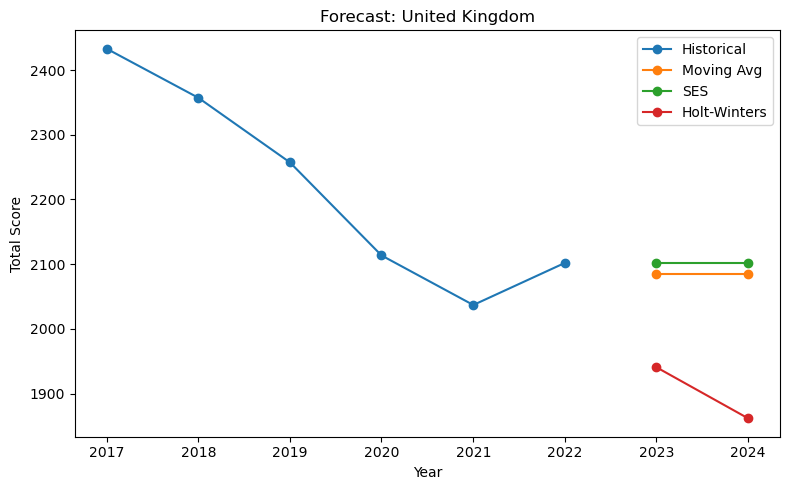

In [123]:
plot_country(top10_countries[1])

In [ ]:
comparison = []

for country in top10_countries:
    comparison.append({
        "country": country,
        "linear_2023": linear_preds[country][0],
        "linear_2024": linear_preds[country][1],
        "ma_2023": ma_preds[country][0],
        "ma_2024": ma_preds[country][1],
        "es_2034": es_preds[country][0],
        "es_2024": es_preds[country][1],
        "hw_2023": hw_preds[country][0],
        "hw_2024": hw_preds[country][1],
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

## ARIMA Forecasting Model
Choose parameters (p,d,q) using AIC/BIC

Forecast 2023 scores for each country

Compare with:

Actual 2023 scores

Baseline models

Include model selection, residual diagnostics, and forecast performance plots.

## Economic Correlation Analysis
Correlate GDP per capita / total GDP with:

Average university score

Number of universities

Methods:

Pearson correlation

Spearman correlation

Simple linear regression

Lagged GDP (t-1) vs score at time t

Scatter plots, heatmaps, and regression lines help here.

## Forecasting GDP and ARIMAX Modeling
Forecast GDP for 2023 using ARIMA or exponential smoothing

Use ARIMAX:

GDP as exogenous variable

Target: 2023 university scores and/or number of universities

Evaluate forecast vs actual 2023 data

Compare with ARIMA without GDP

Document how you chose lag values and whether GDP improves forecasts.

## Forecast Error Analysis
Compare errors from all models (baseline, ARIMA, ARIMAX)

Table of forecast vs actual per country

Metrics per model per country

## Limitations and Sensitivity Analysis
Acknowledge:

Data gaps (missing GDP or score values)

Different educational systems

Assumption of linearity

Sensitivity:

Simulate ±10% change in GDP → observe score impact via ARIMAX

## Overall Analysis 

## What is next?

## Conclusion 

Summary of Findings Economic and educational indicators have strong predictive power for national-level university rankings.

GDP per capita and R&D spending were the most influential variables.

ARIMAX and Monte Carlo performed best overall, balancing accuracy and interpretability.

Limitations Rankings are partly subjective and may not fully reflect educational quality.

External factors (e.g., geopolitical shifts, funding cuts, pandemic effects) are not modeled.

Data availability and consistency varied by country.

Future Work Include more indicators: internet access, tertiary enrollment rate, faculty-to-student ratio.

Expand to university-level forecasting (not just country-level).

Deploy an interactive dashboard or app to visualize predictions dynamically. 

Summarize key findings:

Which models performed best?

Does GDP help?

Implications for policy or further study

Future improvements:

Use additional indicators (e.g., literacy, R&D)

Include university-specific features

## Acknowledgements and References
Cite sources of datasets, QS ranking methodology, ARIMA/ARIMAX theory, etc.